### Sk-learn Clustering & PCA Project!

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.
- If you REALLY cannot find the correct code to make the cell run, consult the `[proj]-ans.ipynb`.
- The final product (what we expect to see if you run all the cells consecutively) will be placed in the `answers/` directory.
    - Chances are your output won't be the exact same (stochasticity!) but it should be similar

In [17]:
# Get used to these imports!
#----------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#----------------------------------------------------------------#

The concept of data "shape"
- [Data Shape in Numpy](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

In [18]:
# Below is the data and labels in two separate variables, find their shapes (this will make it easier to understand what you are working with)
#----------------------------------------------------------------#
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y=True)
#----------------------------------------------------------------#
## TODO: Find and print the shapes of data and labels
# Print the shape of data and the shape of labels

#! Answer
print(f"Data Shape:{data.shape}") # = (1797, 64)
print(f"Label Shape: {labels.shape}") # = (1797,)

Data Shape:(1797, 64)
Label Shape: (1797,)


Splitting data into Train/Test
- [Importance of Train/Test](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)
- [Slicing Tutorial](https://www.learnbyexample.org/python-list-slicing/)

In [19]:
# Split the data AND labels into train and test sets. The train set should have 1000 and the test set should have the rest

## TODO: Create the following variables
# train_data: 1000 training data
# train_labels: 1000 labels associated w/ training data

# test_data: Remaining test data
# test_labels = Remaining labels associated w/ test data

#! Answer
train_data = data[:1000]
train_labels = labels[:1000]

test_data = data[1000:]
test_labels = labels[1000:]

#----------------------------------------------------------------#
print(f"Train Data Shape:{train_data.shape}") # = (1000, 64)
print(f"Train Label Shape: {train_labels.shape}") # = (1000,)

print(f"Test Data Shape:{test_data.shape}") # = (1000, 64)
print(f"Test Label Shape: {test_labels.shape}") # = (797,)
#----------------------------------------------------------------#

Train Data Shape:(1500, 64)
Train Label Shape: (1500,)
Test Data Shape:(297, 64)
Test Label Shape: (297,)


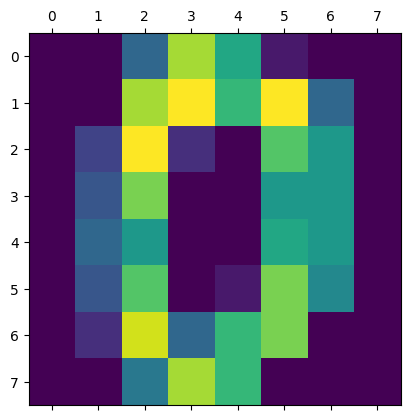

Associated Label: 0


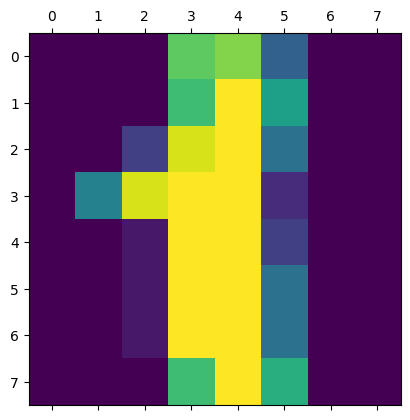

Associated Label: 1


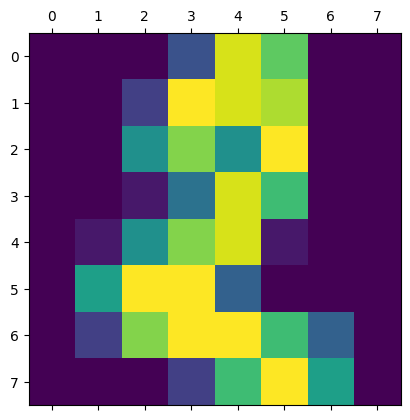

Associated Label: 2


In [20]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
#----------------------------------------------------------------#
num_to_viz = 3
for i in range(num_to_viz):
    plt.matshow(train_data[i].reshape(8, 8))
    plt.show()
    print(f"Associated Label: {train_labels[i]}")
#----------------------------------------------------------------#

Now that you have the data, and understand its form, find out how to properly use PCA & Clustering!
- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

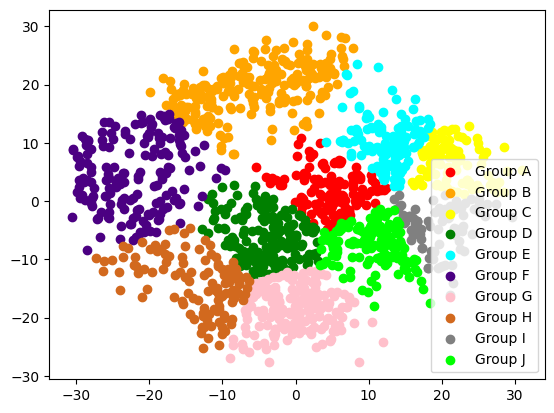

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce the train data using PCA and then fit it using kmeans

## TODO: Create the following variables and execute the following code
# reduced_data: PCA'ed training data
# kmeans: KMeans object for 10 clusters
# Additionally, call kmeans.fit() on the reduced data

#! Answer
reduced_data = PCA(n_components=2).fit_transform(train_data)
kmeans = KMeans(init="random", n_clusters=10, n_init=1)
kmeans.fit(reduced_data)

#----------------------------------------------------------------#
reduced_data = reduced_data.transpose()
colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink", "chocolate", "grey", "lime"] 
fig, ax = plt.subplots()
for g in np.unique(kmeans.labels_):
    idxs = np.where(kmeans.labels_ == g)
    ax.scatter(reduced_data[0][idxs], reduced_data[1][idxs], color=colors[g], label=f"Group {chr(g+65)}")
ax.legend()
#----------------------------------------------------------------#


But we don't know how accurate this is. Clearly the grouping has worked, but think for a second... Does every group consist of only one digit? 

Based on the code the answer is no! Lets test by putting more dots on from the test set after applying the same PCA and see if they end up in similar groups!

Grouping in Numpy
- [Numpy .where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

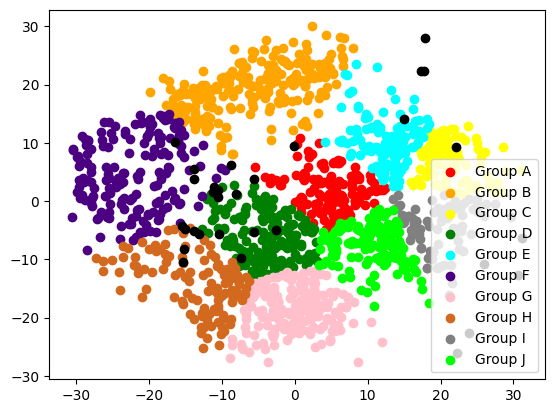

In [22]:
# Pick a digit from the test set and get only its associated, uncompressed information.
# Then apply PCA to it and plot it on the above graph to see if they all land in a similar group

## TODO: Make the following variables:
# digit: Holds the current digit to process
# reduced_data: holds the PCA'ed test data for only the digit stored in "digit"

#! Answer
digit = 9
digit_idxs = np.where(test_labels == digit)
single_digit_data = test_data[digit_idxs]
reduced_data = PCA(n_components=2).fit_transform(single_digit_data)

#----------------------------------------------------------------#
reduced_data = reduced_data.transpose()
ax.scatter(reduced_data[0], reduced_data[1], color="black", label=f"Digit: {digit}")
fig
#----------------------------------------------------------------#


Well, looks like there wasn't *much* of a pattern... But that was expected! I mean look at the data, it is hard for even a human to tell what these digits are. There simply arent enough **features** in the data for PCA to give very meaningful compressed representations.

Extensions: 
- Run the same code with the FULL 28x28 MNIST data. Does a pattern emerge then?
- Try other SK-learn clustering algoritms
- Try T-SNE!

### Congratulations! If you see a colorful plot above this line, you have completed the project! Check your results with the image in the `answers` directory and then send this image to your club/channel/mentor!